In [1]:
# initial imports
import pandas as pd
import requests 
import calendar
import plotly.express as px
import hvplot.pandas
from sqlalchemy import create_engine
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# cfpb:
apor_fixed_url = 'https://s3.amazonaws.com/cfpb-hmda-public/prod/apor/YieldTableFixed.txt'


apor_adj_url = 'https://s3.amazonaws.com/cfpb-hmda-public/prod/apor/YieldTableAdjustable.txt'

In [3]:
apor_fixed_df = pd.read_table(apor_fixed_url, sep='|', index_col='Term of Loan in Years')
apor_fixed_df.head()

1     2     3     4     5     6     7     8     9  \
Term of Loan in Years                                                         
1/2/2017               3.52  3.38  3.47  3.47  3.50  3.50  3.75  3.75  3.90   
1/9/2017               3.52  3.39  3.41  3.41  3.49  3.49  3.77  3.77  3.93   
1/16/2017              3.53  3.40  3.46  3.46  3.43  3.43  3.67  3.67  3.83   
1/23/2017              3.48  3.37  3.36  3.36  3.37  3.37  3.63  3.63  3.78   
1/30/2017              3.32  3.27  3.35  3.35  3.36  3.36  3.64  3.64  3.81   

                         10  ...    41    42    43    44    45    46    47  \
Term of Loan in Years        ...                                             
1/2/2017               3.90  ...  4.36  4.36  4.36  4.36  4.36  4.36  4.36   
1/9/2017               3.93  ...  4.24  4.24  4.24  4.24  4.24  4.24  4.24   
1/16/2017              3.83  ...  4.16  4.16  4.16  4.16  4.16  4.16  4.16   
1/23/2017              3.78  ...  4.13  4.13  4.13  4.13  4.13  4.13  4.13   
1/30/2017              3.81  ...  4.22  4.22  4.22  4.22  4.22  4.22  4.22   

                         48    49    50  
Term of Loan in Years                    
1/2/2017               4.36  4.36  4.36  
1/9/2017               4.24  4.24  4.24  
1/16/2017              4.16  4.16  4.16  
1/23/2017              4.13  4.13  4.13  
1/30/2017              4.22  4.22  4.22  

[5 rows x 50 columns]

In [4]:
apor_adj_df = pd.read_csv(apor_adj_url, sep='|', index_col='Years to First Adjustment')
apor_adj_df.head()

1     2     3     4     5     6     7     8  \
Years to First Adjustment                                                   
1/2/2017                   3.60  3.56  3.57  3.57  3.56  3.56  3.66  3.66   
1/9/2017                   3.59  3.56  3.55  3.55  3.55  3.55  3.67  3.67   
1/16/2017                  3.52  3.50  3.50  3.50  3.48  3.48  3.58  3.58   
1/23/2017                  3.52  3.50  3.48  3.48  3.46  3.46  3.56  3.56   
1/30/2017                  3.49  3.48  3.47  3.47  3.46  3.46  3.57  3.57   

                              9    10  ...    41    42    43    44    45  \
Years to First Adjustment              ...                                 
1/2/2017                   3.77  3.77  ...  3.77  3.77  3.77  3.77  3.77   
1/9/2017                   3.79  3.79  ...  3.79  3.79  3.79  3.79  3.79   
1/16/2017                  3.70  3.70  ...  3.70  3.70  3.70  3.70  3.70   
1/23/2017                  3.67  3.67  ...  3.67  3.67  3.67  3.67  3.67   
1/30/2017                  3.69  3.69  ...  3.69  3.69  3.69  3.69  3.69   

                             46    47    48    49    50  
Years to First Adjustment                                
1/2/2017                   3.77  3.77  3.77  3.77  3.77  
1/9/2017                   3.79  3.79  3.79  3.79  3.79  
1/16/2017                  3.70  3.70  3.70  3.70  3.70  
1/23/2017                  3.67  3.67  3.67  3.67  3.67  
1/30/2017                  3.69  3.69  3.69  3.69  3.69  

[5 rows x 50 columns]

In [5]:
apor_fixed_df = apor_fixed_df.drop(['1','2','3','4','5','6','7','8','9','11','12','13','14','15','16','17','18','19','21','22','23','24','25','26','27','28','29','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50'], axis=1)
apor_fixed_df

10    20    30
Term of Loan in Years                  
1/2/2017               3.90  3.62  4.36
1/9/2017               3.93  3.51  4.24
1/16/2017              3.83  3.44  4.16
1/23/2017              3.78  3.41  4.13
1/30/2017              3.81  3.46  4.22
...                     ...   ...   ...
5/25/2020              3.59  2.80  3.30
6/1/2020               3.55  2.72  3.21
6/8/2020               3.54  2.72  3.24
6/15/2020              3.61  2.73  3.28
6/22/2020              3.56  2.69  3.19

[182 rows x 3 columns]

In [6]:
apor_adj_df = apor_adj_df.drop(['1','2','4','5','7','8','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50'], axis=1)
apor_adj_df

3     6     9
Years to First Adjustment                  
1/2/2017                   3.57  3.56  3.77
1/9/2017                   3.55  3.55  3.79
1/16/2017                  3.50  3.48  3.70
1/23/2017                  3.48  3.46  3.67
1/30/2017                  3.47  3.46  3.69
...                         ...   ...   ...
5/25/2020                  2.96  3.03  3.31
6/1/2020                   2.97  3.03  3.29
6/8/2020                   2.96  3.01  3.28
6/15/2020                  2.97  3.03  3.33
6/22/2020                  2.97  3.02  3.30

[182 rows x 3 columns]

In [7]:
csvpath_fix = Path('./Resources/YieldTableFixed.csv')
apor_fixed_df_00_16 = pd.read_csv(csvpath_fix, index_col='Term of Loan in Years')
apor_fixed_df_00_16

1     2     3     4     5     6     7     8     9  \
Term of Loan in Years                                                         
1/3/2000               8.64  7.92  7.62  7.62  7.40  7.40  7.47  7.47  7.27   
1/10/2000              8.49  7.89  7.63  7.63  7.44  7.44  7.49  7.49  7.34   
1/17/2000              8.69  8.02  7.72  7.72  7.52  7.52  7.53  7.53  7.39   
1/24/2000              8.83  8.08  7.76  7.76  7.53  7.53  7.53  7.53  7.41   
1/31/2000              8.54  7.94  7.69  7.69  7.53  7.53  7.54  7.54  7.43   
...                     ...   ...   ...   ...   ...   ...   ...   ...   ...   
11/28/2016             3.23  3.12  3.23  3.23  3.28  3.28  3.58  3.58  3.73   
12/5/2016              3.19  3.11  3.24  3.24  3.31  3.31  3.61  3.61  3.76   
12/12/2016             3.22  3.22  3.26  3.26  3.37  3.37  3.66  3.66  3.82   
12/19/2016             3.25  3.16  3.28  3.28  3.35  3.35  3.65  3.65  3.83   
12/26/2016             3.37  3.28  3.41  3.41  3.48  3.48  3.76  3.76  3.92   

                         10  ...    41    42    43    44    45    46    47  \
Term of Loan in Years        ...                                             
1/3/2000               7.27  ...  8.17  8.17  8.17  8.17  8.17  8.17  8.17   
1/10/2000              7.34  ...  8.26  8.26  8.26  8.26  8.26  8.26  8.26   
1/17/2000              7.39  ...  8.29  8.29  8.29  8.29  8.29  8.29  8.29   
1/24/2000              7.41  ...  8.37  8.37  8.37  8.37  8.37  8.37  8.37   
1/31/2000              7.43  ...  8.36  8.36  8.36  8.36  8.36  8.36  8.36   
...                     ...  ...   ...   ...   ...   ...   ...   ...   ...   
11/28/2016             3.73  ...  4.07  4.07  4.07  4.07  4.07  4.07  4.07   
12/5/2016              3.76  ...  4.12  4.12  4.12  4.12  4.12  4.12  4.12   
12/12/2016             3.82  ...  4.17  4.17  4.17  4.17  4.17  4.17  4.17   
12/19/2016             3.83  ...  4.20  4.20  4.20  4.20  4.20  4.20  4.20   
12/26/2016             3.92  ...  4.34  4.34  4.34  4.34  4.34  4.34  4.34   

                         48    49    50  
Term of Loan in Years                    
1/3/2000               8.17  8.17  8.17  
1/10/2000              8.26  8.26  8.26  
1/17/2000              8.29  8.29  8.29  
1/24/2000              8.37  8.37  8.37  
1/31/2000              8.36  8.36  8.36  
...                     ...   ...   ...  
11/28/2016             4.07  4.07  4.07  
12/5/2016              4.12  4.12  4.12  
12/12/2016             4.17  4.17  4.17  
12/19/2016             4.20  4.20  4.20  
12/26/2016             4.34  4.34  4.34  

[887 rows x 50 columns]

In [8]:
csvpath_adj = Path('./Resources/YieldTableAdjustable.csv')
apor_adj_df_00_16 = pd.read_csv(csvpath_adj, index_col='Years to First Adjustment')
apor_adj_df_00_16

1     2     3     4     5     6     7     8  \
Years to First Adjustment                                                   
1/3/2000                   8.61  8.47  8.33  8.33  8.09  8.09  7.98  7.98   
1/10/2000                  8.69  8.56  8.41  8.41  8.17  8.17  8.04  8.04   
1/17/2000                  8.75  8.63  8.47  8.47  8.23  8.23  8.08  8.08   
1/24/2000                  8.77  8.65  8.49  8.49  8.24  8.24  8.09  8.09   
1/31/2000                  8.77  8.64  8.49  8.49  8.25  8.25  8.10  8.10   
...                         ...   ...   ...   ...   ...   ...   ...   ...   
11/28/2016                 3.48  3.44  3.44  3.44  3.42  3.42  3.53  3.53   
12/5/2016                  3.47  3.44  3.43  3.43  3.43  3.43  3.54  3.54   
12/12/2016                 3.50  3.48  3.47  3.47  3.47  3.47  3.58  3.58   
12/19/2016                 3.55  3.52  3.51  3.51  3.50  3.50  3.61  3.61   
12/26/2016                 3.58  3.55  3.56  3.56  3.55  3.55  3.67  3.67   

                              9    10  ...    41    42    43    44    45  \
Years to First Adjustment              ...                                 
1/3/2000                   7.68  7.68  ...  7.68  7.68  7.68  7.68  7.68   
1/10/2000                  7.76  7.76  ...  7.76  7.76  7.76  7.76  7.76   
1/17/2000                  7.81  7.81  ...  7.81  7.81  7.81  7.81  7.81   
1/24/2000                  7.83  7.83  ...  7.83  7.83  7.83  7.83  7.83   
1/31/2000                  7.85  7.85  ...  7.85  7.85  7.85  7.85  7.85   
...                         ...   ...  ...   ...   ...   ...   ...   ...   
11/28/2016                 3.64  3.64  ...  3.64  3.64  3.64  3.64  3.64   
12/5/2016                  3.65  3.65  ...  3.65  3.65  3.65  3.65  3.65   
12/12/2016                 3.70  3.70  ...  3.70  3.70  3.70  3.70  3.70   
12/19/2016                 3.73  3.73  ...  3.73  3.73  3.73  3.73  3.73   
12/26/2016                 3.79  3.79  ...  3.79  3.79  3.79  3.79  3.79   

                             46    47    48    49    50  
Years to First Adjustment                                
1/3/2000                   7.68  7.68  7.68  7.68  7.68  
1/10/2000                  7.76  7.76  7.76  7.76  7.76  
1/17/2000                  7.81  7.81  7.81  7.81  7.81  
1/24/2000                  7.83  7.83  7.83  7.83  7.83  
1/31/2000                  7.85  7.85  7.85  7.85  7.85  
...                         ...   ...   ...   ...   ...  
11/28/2016                 3.64  3.64  3.64  3.64  3.64  
12/5/2016                  3.65  3.65  3.65  3.65  3.65  
12/12/2016                 3.70  3.70  3.70  3.70  3.70  
12/19/2016                 3.73  3.73  3.73  3.73  3.73  
12/26/2016                 3.79  3.79  3.79  3.79  3.79  

[887 rows x 50 columns]

In [9]:
apor_fixed_df_00_16 = apor_fixed_df_00_16.drop(['1','2','3','4','5','6','7','8','9','11','12','13','14','15','16','17','18','19','21','22','23','24','25','26','27','28','29','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50'], axis=1)
apor_fixed_df_00_16

10    20    30
Term of Loan in Years                  
1/3/2000               7.27  7.83  8.17
1/10/2000              7.34  7.90  8.26
1/17/2000              7.39  7.95  8.29
1/24/2000              7.41  8.03  8.37
1/31/2000              7.43  8.01  8.36
...                     ...   ...   ...
11/28/2016             3.73  3.32  4.07
12/5/2016              3.76  3.41  4.12
12/12/2016             3.82  3.43  4.17
12/19/2016             3.83  3.44  4.20
12/26/2016             3.92  3.59  4.34

[887 rows x 3 columns]

In [10]:
apor_adj_df_00_16 = apor_adj_df_00_16.drop(['1','2','4','5','7','8','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50'], axis=1)
apor_adj_df_00_16

3     6     9
Years to First Adjustment                  
1/3/2000                   8.33  8.09  7.68
1/10/2000                  8.41  8.17  7.76
1/17/2000                  8.47  8.23  7.81
1/24/2000                  8.49  8.24  7.83
1/31/2000                  8.49  8.25  7.85
...                         ...   ...   ...
11/28/2016                 3.44  3.42  3.64
12/5/2016                  3.43  3.43  3.65
12/12/2016                 3.47  3.47  3.70
12/19/2016                 3.51  3.50  3.73
12/26/2016                 3.56  3.55  3.79

[887 rows x 3 columns]

In [11]:
apor_fix_combined = pd.concat([apor_fixed_df_00_16, apor_fixed_df], axis=0)
apor_fix_combined

10    20    30
Term of Loan in Years                  
1/3/2000               7.27  7.83  8.17
1/10/2000              7.34  7.90  8.26
1/17/2000              7.39  7.95  8.29
1/24/2000              7.41  8.03  8.37
1/31/2000              7.43  8.01  8.36
...                     ...   ...   ...
5/25/2020              3.59  2.80  3.30
6/1/2020               3.55  2.72  3.21
6/8/2020               3.54  2.72  3.24
6/15/2020              3.61  2.73  3.28
6/22/2020              3.56  2.69  3.19

[1069 rows x 3 columns]

In [12]:
apor_adj_combined = pd.concat([apor_adj_df_00_16, apor_adj_df], axis=0)
apor_adj_combined

3     6     9
Years to First Adjustment                  
1/3/2000                   8.33  8.09  7.68
1/10/2000                  8.41  8.17  7.76
1/17/2000                  8.47  8.23  7.81
1/24/2000                  8.49  8.24  7.83
1/31/2000                  8.49  8.25  7.85
...                         ...   ...   ...
5/25/2020                  2.96  3.03  3.31
6/1/2020                   2.97  3.03  3.29
6/8/2020                   2.96  3.01  3.28
6/15/2020                  2.97  3.03  3.33
6/22/2020                  2.97  3.02  3.30

[1069 rows x 3 columns]

In [13]:
percent_change_fix = apor_fix_combined.pct_change()
percent_change_fix = percent_change_fix.dropna()
percent_change_fix

10        20        30
Term of Loan in Years                              
1/10/2000              0.009629  0.008940  0.011016
1/17/2000              0.006812  0.006329  0.003632
1/24/2000              0.002706  0.010063  0.009650
1/31/2000              0.002699 -0.002491 -0.001195
2/7/2000              -0.024226  0.001248  0.000000
...                         ...       ...       ...
5/25/2020              0.000000 -0.007092 -0.011976
6/1/2020              -0.011142 -0.028571 -0.027273
6/8/2020              -0.002817  0.000000  0.009346
6/15/2020              0.019774  0.003676  0.012346
6/22/2020             -0.013850 -0.014652 -0.027439

[1068 rows x 3 columns]

In [14]:
percent_change_adj = apor_adj_combined.pct_change()
percent_change_adj = percent_change_adj.dropna()
percent_change_adj

3         6         9
Years to First Adjustment                              
1/10/2000                  0.009604  0.009889  0.010417
1/17/2000                  0.007134  0.007344  0.006443
1/24/2000                  0.002361  0.001215  0.002561
1/31/2000                  0.000000  0.001214  0.002554
2/7/2000                   0.011779  0.008485 -0.011465
...                             ...       ...       ...
5/25/2020                  0.000000  0.000000  0.000000
6/1/2020                   0.003378  0.000000 -0.006042
6/8/2020                  -0.003367 -0.006601 -0.003040
6/15/2020                  0.003378  0.006645  0.015244
6/22/2020                  0.000000 -0.003300 -0.009009

[1068 rows x 3 columns]

In [15]:
percent_change_fix.hvplot.line(ylabel = "pct change in APOR", rot=90, figsize=(30,10))
#how to clean up x axis

:NdOverlay   [Variable]
   :Curve   [Term of Loan in Years]   (value)

In [16]:
percent_change_adj.hvplot.line(ylabel = "pct change in APOR", rot=90, figsize=(30,10))

:NdOverlay   [Variable]
   :Curve   [Years to First Adjustment]   (value)

In [17]:
percent_change_fix.hvplot.line(ylabel = "pct change in APOR", rot=90, figsize=(30,10)) * percent_change_adj.hvplot.line(ylabel = "pct change in APOR", rot=90, figsize=(30,10))

:Overlay
   .NdOverlay.I  :NdOverlay   [Variable]
      :Curve   [Term of Loan in Years]   (value)
   .NdOverlay.II :NdOverlay   [Variable]
      :Curve   [Years to First Adjustment]   (value)

In [18]:
volatility_fix = percent_change_fix.std()*(252**0.5)
print(volatility_fix)

10    0.265126
20    0.302589
30    0.279888
dtype: float64


In [19]:
volatility_adj = percent_change_adj.std()*(252**0.5)
print(volatility_adj)

3    0.245131
6    0.236033
9    0.220072
dtype: float64


In [20]:
current_apor_fix_10 = apor_fixed_df['10'][-1]
current_apor_fix_20 = apor_fixed_df['20'][-1]
current_apor_fix_30 = apor_fixed_df['30'][-1]
current_apor_fix_10

3.56

In [21]:
current_apor_adj_3 = apor_adj_df['3'][-1]
current_apor_adj_6 = apor_adj_df['6'][-1]
current_apor_adj_9 = apor_adj_df['9'][-1]
current_apor_adj_3

2.97

In [22]:
mean_fix = percent_change_fix.mean()
print(mean_fix)

10   -0.000529
20   -0.000820
30   -0.000726
dtype: float64


In [23]:
mean_fix_30 = mean_fix['30']
print(mean_fix_30)

-0.0007264566953659438


In [24]:
mean_adj = percent_change_adj.mean()
print(mean_adj)

3   -0.000845
6   -0.000811
9   -0.000694
dtype: float64


In [25]:
mean_adj_3 = mean_adj['3']
print(mean_adj_3)

-0.0008446982056346131


In [26]:
std_dev_fix = percent_change_fix.std()
print(std_dev_fix)

10    0.016701
20    0.019061
30    0.017631
dtype: float64


In [27]:
std_dev_fix_30 = std_dev_fix['30']
print(std_dev_fix_30)

0.017631310078654937


In [28]:
std_dev_adj = percent_change_adj.std()
print(std_dev_adj)

3    0.015442
6    0.014869
9    0.013863
dtype: float64


In [29]:
std_dev_adj_3 = std_dev_adj['3']
print(std_dev_adj_3)

0.015441832259612263


In [30]:
number_simulations = 100
number_records = 52 * 3

In [31]:
# Run the Monte Carlo Simulation
simulated_apor_fix_df = pd.DataFrame()
simulated_apor_adj_df = pd.DataFrame()
count = 1

for n in range(number_simulations):
    simulated_apor_fixed = [current_apor_fix_30]
    simulated_apor_adjustable = [current_apor_adj_3]
    for i in range(number_records):
        simulated_apor_fix = simulated_apor_fixed[-1] * (1 + np.random.normal(mean_fix_30, std_dev_fix_30))
        simulated_apor_adj = simulated_apor_adjustable[-1] * (1 + np.random.normal(mean_adj_3, std_dev_adj_3))
        
        simulated_apor_fixed.append(simulated_apor_fix)
        simulated_apor_adjustable.append(simulated_apor_adj)

    simulated_apor_fix_df[count] = pd.Series(simulated_apor_fixed)
    simulated_apor_adj_df[count] = pd.Series(simulated_apor_adjustable)
    count += 1


In [32]:
simulated_apor_fix_df

1         2         3         4         5         6         7    \
0    3.190000  3.190000  3.190000  3.190000  3.190000  3.190000  3.190000   
1    3.089594  3.147413  3.073478  3.164198  3.175210  3.218616  3.155543   
2    3.095282  3.179243  3.029555  3.169171  3.218503  3.206676  3.242225   
3    3.122127  3.124969  3.027976  3.119575  3.177613  3.231226  3.175148   
4    3.109975  3.092478  3.050643  3.163262  3.201524  3.292936  3.136322   
..        ...       ...       ...       ...       ...       ...       ...   
152  3.053361  2.975118  1.975802  2.707719  2.673405  2.050540  3.098059   
153  3.052105  2.971004  1.998017  2.719219  2.664288  2.004741  3.143136   
154  3.023278  2.934931  1.964921  2.703185  2.574958  1.989625  3.230585   
155  3.148561  2.933038  2.005099  2.725807  2.620157  1.993986  3.150600   
156  3.159900  3.002333  1.996760  2.682677  2.552211  2.005984  3.166251   

          8         9         10   ...       91        92        93   \
0    3.190000  3.190000  3.190000  ...  3.190000  3.190000  3.190000   
1    3.264795  3.181006  3.145378  ...  3.223422  3.251730  3.101765   
2    3.298395  3.174860  3.210451  ...  3.159744  3.287820  3.062969   
3    3.326874  3.196988  3.287640  ...  3.101456  3.240647  3.125297   
4    3.353313  3.255776  3.214789  ...  3.175844  3.224374  3.081310   
..        ...       ...       ...  ...       ...       ...       ...   
152  2.763222  3.848259  3.483166  ...  2.650955  2.496902  2.714852   
153  2.724733  3.857526  3.433767  ...  2.646391  2.465978  2.700487   
154  2.724053  3.824726  3.369306  ...  2.561889  2.485306  2.667397   
155  2.681616  3.797768  3.340165  ...  2.518775  2.572399  2.721532   
156  2.715092  3.718118  3.395778  ...  2.609632  2.588093  2.720489   

          94        95        96        97        98        99        100  
0    3.190000  3.190000  3.190000  3.190000  3.190000  3.190000  3.190000  
1    3.167545  3.266001  3.147257  3.163560  3.141856  3.173843  3.195124  
2    3.113190  3.254636  3.152792  3.123288  3.128924  3.171424  3.362517  
3    3.029229  3.268573  3.217512  3.035587  3.133451  3.126468  3.407038  
4    2.994204  3.224887  3.172303  3.033381  3.110684  3.146982  3.426406  
..        ...       ...       ...       ...       ...       ...       ...  
152  3.132893  3.451861  2.407208  3.022755  2.209920  2.820135  3.291044  
153  3.102340  3.503131  2.353185  2.961095  2.234924  2.849427  3.309577  
154  3.071409  3.553250  2.438138  2.991407  2.223661  2.842810  3.245393  
155  3.019199  3.560917  2.468152  3.062918  2.264823  2.720082  3.275054  
156  3.025200  3.517734  2.417622  3.000805  2.282671  2.625197  3.175849  

[157 rows x 100 columns]

In [33]:
simulated_apor_fix_df.hvplot(title='Simulated Fixed APOR for 30 year', figsize=(20,10))

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [34]:
simulated_apor_adj_df

1         2         3         4         5         6         7    \
0    2.970000  2.970000  2.970000  2.970000  2.970000  2.970000  2.970000   
1    2.901373  2.982888  2.981194  2.897727  2.987801  2.921607  3.025309   
2    2.884262  3.008242  2.951651  2.818822  2.983739  2.936550  3.043103   
3    2.855957  2.971837  2.922843  2.854274  2.880392  2.955708  3.019062   
4    2.826942  2.988877  2.966379  2.826527  2.954830  2.978608  3.032470   
..        ...       ...       ...       ...       ...       ...       ...   
152  2.611435  3.045817  2.211511  1.874537  2.547070  1.524493  2.308570   
153  2.620516  3.024770  2.174654  1.886630  2.567229  1.510866  2.298412   
154  2.689438  2.932885  2.130358  1.881105  2.534387  1.528668  2.265292   
155  2.585020  2.932506  2.148975  1.888486  2.496249  1.529013  2.173484   
156  2.548051  2.928522  2.139253  1.902788  2.464854  1.477892  2.184772   

          8         9         10   ...       91        92        93   \
0    2.970000  2.970000  2.970000  ...  2.970000  2.970000  2.970000   
1    3.037371  2.915901  2.871454  ...  2.948990  2.992598  2.889442   
2    2.968733  2.903703  2.871414  ...  2.993054  2.968528  2.972863   
3    2.927620  2.913442  2.918510  ...  2.946506  3.022964  2.920172   
4    2.992293  2.922120  2.963047  ...  2.938641  3.045697  2.835545   
..        ...       ...       ...  ...       ...       ...       ...   
152  1.894532  2.855181  2.061028  ...  2.925608  2.548541  2.418192   
153  1.888330  2.848803  2.060590  ...  2.935836  2.556333  2.410482   
154  1.834013  2.759578  2.079867  ...  2.912295  2.596039  2.394754   
155  1.811038  2.724173  2.090286  ...  2.863777  2.533067  2.380916   
156  1.814679  2.645074  2.132605  ...  2.876729  2.575993  2.369514   

          94        95        96        97        98        99        100  
0    2.970000  2.970000  2.970000  2.970000  2.970000  2.970000  2.970000  
1    2.978538  2.966422  2.886917  2.950582  2.927445  2.995027  3.003396  
2    3.054732  3.028164  2.964709  2.967946  2.878389  3.033100  2.976229  
3    3.034600  3.048792  2.955543  2.976762  2.887495  3.033806  2.959073  
4    3.089689  2.994545  2.913431  2.920003  2.945826  3.058379  2.944294  
..        ...       ...       ...       ...       ...       ...       ...  
152  3.452334  2.286575  3.936248  2.518233  2.504819  2.601682  2.395038  
153  3.456201  2.304580  3.884172  2.475748  2.477477  2.637306  2.375483  
154  3.425408  2.258790  3.867003  2.444992  2.479812  2.563450  2.377272  
155  3.418277  2.297007  3.868395  2.458879  2.471983  2.524788  2.444137  
156  3.408818  2.257705  3.916948  2.426360  2.526254  2.507500  2.354742  

[157 rows x 100 columns]

In [35]:
simulated_apor_adj_df.hvplot(title='Simulated APOR for 3yr ARM', figsize=(20,10))

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [36]:
last_apor_yr3_fix = simulated_apor_fix_df.iloc[-1,:]
print(last_apor_yr3_fix)

1      3.159900
2      3.002333
3      1.996760
4      2.682677
5      2.552211
         ...   
96     2.417622
97     3.000805
98     2.282671
99     2.625197
100    3.175849
Name: 156, Length: 100, dtype: float64


In [37]:
last_apor_yr3_adj = simulated_apor_adj_df.iloc[-1,:]
print(last_apor_yr3_adj)

1      2.548051
2      2.928522
3      2.139253
4      1.902788
5      2.464854
         ...   
96     3.916948
97     2.426360
98     2.526254
99     2.507500
100    2.354742
Name: 156, Length: 100, dtype: float64


In [38]:
confidence_interval_fix = last_apor_yr3_fix.quantile(q=[0.05, 0.95])
confidence_interval_fix

0.05    1.991612
0.95    4.039059
Name: 156, dtype: float64

In [39]:
confidence_interval_adj = last_apor_yr3_adj.quantile(q=[0.05, 0.95])
confidence_interval_adj

0.05    1.901474
0.95    3.457217
Name: 156, dtype: float64

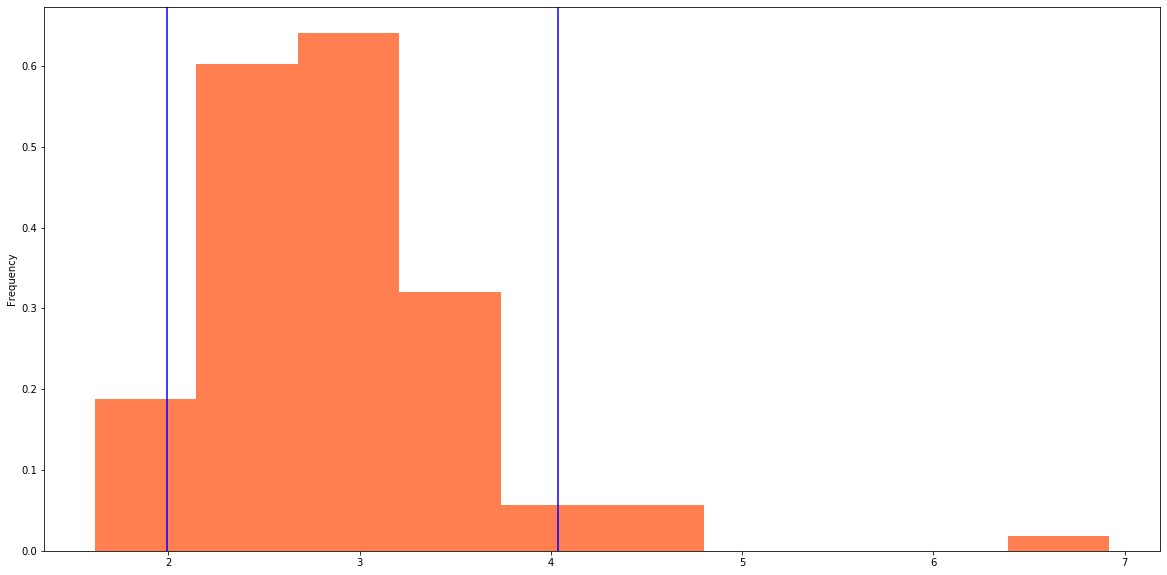

In [41]:
plt.figure(figsize=(20,10));
last_apor_yr3_fix.plot(kind='hist', color='coral', density=True) #, xlabel = 'Simulated APOR Fixed')
plt.axvline(confidence_interval_fix.iloc[0], color='b')
plt.axvline(confidence_interval_fix.iloc[1], color='b')

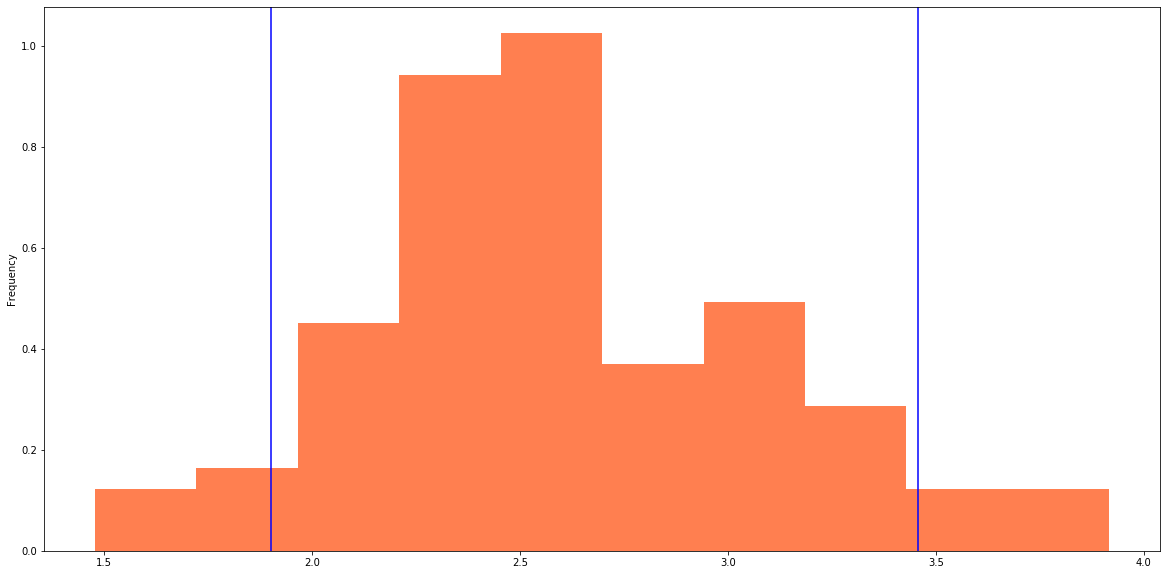

In [42]:
plt.figure(figsize=(20,10));
last_apor_yr3_adj.plot(kind='hist', color='coral', density=True)
plt.axvline(confidence_interval_adj.iloc[0], color='b')
plt.axvline(confidence_interval_adj.iloc[1], color='b')

In [43]:
sim_mean_fix = last_apor_yr3_fix.mean()
print(sim_mean_fix)

2.8787428866115707


In [44]:
sim_mean_adj = last_apor_yr3_adj.mean()
print(sim_mean_adj)

2.606284977428425


In [45]:
estimated_change_fix = sim_mean_fix - current_apor_fix_30
estimated_change_fix

-0.3112571133884292

In [47]:
estimated_change_adj = sim_mean_adj - current_apor_adj_3
estimated_change_adj

-0.3637150225715753